_Kalp krizi riski'ne ilişkin veri kümesini kullanarak:_
- _ncomponents = 2 olarak ayarlayarak kalp hastalığı verilerine GMM uygulayın. Çözümünüz için ARI ve siluet skorlarına bakın ve önceki derslerde k-means ve hiyerarşik kümeleme çözümleriyle karşılaştırın. Hangi algoritma daha iyi performans gösteriyor?_
- _sklearn ile GMM uygulanırken kullanılan parametrelerden biri de covarianceType'dir. Bu parametre, kullanılacak kovaryans parametrelerinin türünü belirler. Özellikle, belirtebileceğiniz dört tür vardır, bunları deneyin. Hangisi ARI ve siluet skorları açısından daha iyi performans gösteriyor?_

    - _full: Bu varsayılandır. Her bileşenin kendi genel kovaryans matrisi vardır._
    - _tied: Tüm bileşenler aynı genel kovaryans matrisini paylaşır._
    - _diag: Her bir bileşenin kendi çapraz kovaryans matrisi vardır._
    - _spherical: Her bir bileşenin kendine ait tek bir varyansı vardır._


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

In [2]:
df = pd.read_excel('heart.xlsx')
df['ca'] = df.ca.replace('<null>', 0)
df['thal'] = df.thal.replace('<null>', 3)
df['num'] = df.num.replace({'positive':1, "negative":0})
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
2,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [3]:
y = df.num
x = df.drop('num', axis=1)

scaler = StandardScaler()
x_std = scaler.fit_transform(x)

x_pca = PCA(n_components = 2).fit_transform(x_std)
df_pca = pd.DataFrame(x_pca)

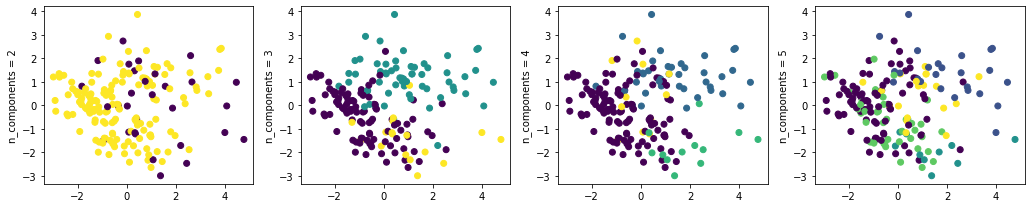

In [4]:
plt.figure(figsize=(18,3))
for num, k in enumerate(range(2,6), 1):
    y_label = GaussianMixture(n_components = k, random_state = 42).fit_predict(x_std)
    plt.subplot(1, 5, num)
    plt.scatter(x_pca[:,0], x_pca[:,1], c = y_label)
    plt.ylabel('n_components = '+ str(k))
    plt.tight_layout()

In [5]:
dflabel = pd.DataFrame()
for k in range(2,6):
    y_label = GaussianMixture(n_components = k, random_state = 42).fit_predict(x_std)
    dflabel = dflabel.append(pd.DataFrame({'ari' : metrics.adjusted_rand_score(y, y_label),
                                           'silhouette': metrics.silhouette_score(x_std, y_label)},
                                            index = ['gmm_'+str(k)]))
dflabel

,ari,silhouette
gmm_2,0.109235,0.193826
gmm_3,0.087286,0.132679
gmm_4,0.173310,0.149319
gmm_5,0.088724,0.076370


In [6]:
dftype = pd.DataFrame()
for c in ['full', 'tied', 'diag', 'spherical']:
    y_label = GaussianMixture(n_components = 2, covariance_type = c, random_state = 42).fit_predict(x_std)
    dftype = dftype.append(pd.DataFrame({'ari' : metrics.adjusted_rand_score(y, y_label),
                                           'silhouette': metrics.silhouette_score(x_std, y_label)},
                                            index = ['gmm_'+str(c)]))
dftype

,ari,silhouette
gmm_full,0.109235,0.193826
gmm_tied,0.031112,0.099732
gmm_diag,-0.035681,0.170492
gmm_spherical,-0.008435,0.110783


> - GMM yöntemi, kmeans yöntemine göre daha düşük performans gösterdi.
> - Kullanılan kovaryans parametreleri arasından en iyi skoru 'full' elde etti.
> - Diğer yöntemler için de 4 kümeleme performansı yüksek seyretmişti.

|           | ARI      | Silhouette |
|-----------|----------|------------|
| kmeans    | 0.067444 | 0.366772   |
| hierarchy | 0.454083 | 0.286047   |
| dcscan    | 0.281716 | 0.320221   |
| gmm       | 0.109235 | 0.193826   |


> Kümeleme algoritma arasında en iyi performası Kmeans sergiledi. Verisetinin hedef dağılımı düşük olduğundan kaynaklı ARI değerinin düşük sonuçlandığını düşünmekteyim. Smote uyğulandığında daha verimli sonuçlar alınmaktadır. Tablo verileri, en iyi sonuçların alındığı parametreler ile oluşturulmuştur.